# __1. Write an algorithm to compute the factorial of a positive integer n:__

In [35]:
# Usually the recursion limit is 3000, the code below will change that to 6000.
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(6000)
print(sys.getrecursionlimit())

6000
6000


In [36]:
# Recursive non-tail
def recur_nontail_factorial(n):
    if n == 1:
        return n
    else:
        return n * recur_nontail_factorial(n-1)

In [37]:
# Recursive tail
def recur_tail_factorial(n, accummulator):
    if n == 1:
        return accummulator
    else:
        return recur_tail_factorial(n-1, n*accummulator)

In [38]:
# Iterative
def iter_factorial(n):
    result = 1
    for i in range(n):
        result *=   i + 1
    return result

# __2. For different values of n, implement your algorith using two approaches: iterative and recursive (tail and non-tail recursions). For each case, plot nunning time as a function of n and compare achieved results:__

In [39]:
# function to create a list of numbers
# function takes 3 argumets:
# r1 is the first number of the list
# r2 is the last number of the list
# step is how many numbers to skip
# returns a list of numbers from number r1 to number r2, skipping step numbers between them
# code adapted from https://www.geeksforgeeks.org/python-create-list-of-numbers-with-given-range/
def createList(r1, r2, step):
    value_list = []
    for i in range(r1, r2, step):
        value_list.append(i)
    return value_list

In [40]:
factorial_list = []
range_list = createList(100, 5000, 100)
for i in range(100, 5000, 100):
    factorial = iter_factorial(i)
    factorial_list.append(factorial)

__The function averageList is used in the functions below: recursive_nontail_factorial_sampler, recursive_tail_factorial_sampler and interative_factorial_sampler.
The purpose is to run the factorial for the same number many times and get an average run time.__

In [41]:
# function to get avarage number
# takes in an array as argument, returns the average
# code adapted from https://www.geeksforgeeks.org/find-average-list-python/
def averageList(list): 
    return sum(list) / len(list)

__Functions recursive_nontail_factorial_sampler, recursive_tail_factorial_sampler and interative_factorial_sampler below will take 2 ints as arguments: value is the number we wish to run the factorial function for and sample_size is how many times to run that factorial function with that number.__

In [50]:

# Function takes 2 arguments: value is any int, sample_size is an int for the number of for loops
# Function returns an average for all the numbers in the array

import time
def recursive_nontail_factorial_sampler(value, sample_size):
#     initialize duration array
    duration_list_nontail = []
#     run for loop sample_size amount of times
    for i in range(sample_size):
#         time how long it takes to run recur_nontail_factorial with the value given
        start_time = time.time()
        recur_nontail_factorial(value)
        duration = time.time() - start_time
#         append result to array each time
        duration_list_nontail.append(duration)
#     return average of array duration_list_nontail using function averageList mentioned above
    return averageList(duration_list_nontail)

def recursive_tail_factorial_sampler(value, sample_size):
#     initialize duration array
    duration_list_tail = []
#     run for loop sample_size amount of times
    for i in range(sample_size):
#         time how long it takes to run recur_tail_factorial with the value given        
        start_time = time.time()
        recur_tail_factorial(value, 1)
        duration = time.time() - start_time
#         append result to array each time
        duration_list_tail.append(duration)
#     return average of array duration_list_tail using function averageList mentioned above
    return averageList(duration_list_tail)

def interative_factorial_sampler(value, sample_size):
#     initialize duration array
    duration_list_iterative = []
#     run for loop sample_size amount of times
    for i in range(sample_size):
#         time how long it takes to run iter_factorial with the value given  
        start_time = time.time()
        iter_factorial(value)
        duration = time.time() - start_time
#         append result to array each time
        duration_list_iterative.append(duration)
#     return average of array duration_list_tail using function averageList mentioned above
    return averageList(duration_list_iterative)


__The for loop below will call the functins above for each number in an array and append the results to another array.
Initally I had a naive implementation that called the functions once per numeric imput. I noticed unusual spikes in the graph upon running several times. This seemed be caused by activity on the computer unrelated to the current task. So I decided to run the same numeric imput 100 times and get an average to smooth out these spikes.__

In [51]:
# sample_size is the number of times the tester wants to run each number of the array
sample_size = 100
# value_list will use function above createList to create a an array of numbers to be run in the for loop bellow.
# the purpose is to make it easier for the tester to use different values to run the factorial functions
value_list = createList(100, 5000, 100)
# initalize arrays to be ploted in a graph for each factorial
results_list_nontail = []
results_list_tail = []
results_list_iterative = []

# run each value in our value_list
for value in value_list:
#     each value will be used as an argument to call function recursive_nontail_factorial_sampler
#     the sample_size in this case is 100, so the factorial for the value will be run 100 times in the
#     function recursive_nontail_factorial_sampler, which will return an average of all 100 results.
    average_duration_nontail = recursive_nontail_factorial_sampler(value, sample_size)
#     each result will be appended to our array to be plot in a graph
    results_list_nontail.append(average_duration_nontail)
    
#     each value will be used as an argument to call function recursive_tail_factorial_sampler
#     the sample_size in this case is 100, so the factorial for the value will be run 100 times in the
#     function recursive_tail_factorial_sampler, which will return an average of all 100 results.   
    average_duration_tail = recursive_tail_factorial_sampler(value, sample_size)
#     each result will be appended to our array to be plot in a graph
    results_list_tail.append(average_duration_tail)
    
#     each value will be used as an argument to call function interative_factorial_sampler
#     the sample_size in this case is 100, so the factorial for the value will be run 100 times in the
#     function interative_factorial_sampler, which will return an average of all 100 results.  
    average_duration_iterative = interative_factorial_sampler(value, sample_size)
#     each result will be appended to our array to be plot in a graph
    results_list_iterative.append(average_duration_iterative)


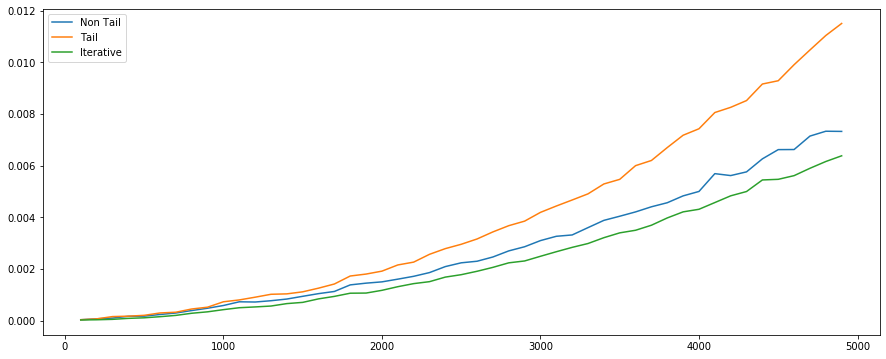

In [53]:
# code to plot results adapted from https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html

import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
x = value_list
a = results_list_nontail
plt.plot(x, a, label = "Non Tail")


b = results_list_tail
plt.plot(x, b,label = "Tail")

c = results_list_iterative
plt.plot(x, c, label = "Iterative")

plt.legend()

plt.savefig('Factorial_functions.png')

plt.show()

__The graph shows that all algorithm have a similar run time for lower numbers.__

__Tail recursive is the slowest algorith for running high numbers, this happens because a recursive function calls itself, the compiler needs to save the stack frames to use later. There is also the chance of it causing a stack overflow as there is no way to prodict the number of calls.__

__The Non-tail recursive is more efficient than the non-tail, since the recursive calls do not need to be saved to the stack frames, only the current call. It is harder to write because it needs to take an accumulator and return an accumulator to free up the stack.__

__The Iterative function is even more efficient. It is possible to turn recursive functions into iterative functions as shown in recur_tail_factorial() and iter_factorial(). This is done by re-writing the code to use a while or for loop instead of an if statement.__


# __3. Use one of the sequences obtained from task 2 as an input for a binary search algorithm. Implement the binary search algorith using two methods: iterative and recursive:__

# __4. For each approach, compute the best and worst running times. Give some examples by ploting the running time as a function of n:__

In [54]:
# code given by lecturer in class
def binary_search_iterative(data, target):
    """Return True if target is found in the given Python list."""
    low = 0
    high = len(data)-1

    while low <= high:
        mid = (low + high) // 2
        if target == data[mid]:         # found a match
            return True
        elif target < data[mid]:
            high = mid - 1                # only consider values left of mid
        else:
            low = mid + 1                 # only consider values right of mid
    return False                      # loop ended without success

__Binary search iterative takes two arguments, first one being a list and the second one the element of the list to be searched for.
This search algorith uses a while loop to find the mid point every time on the loop, thus making the list half as long each time to try and locate the target.__

In [55]:
# code given by lecturer in class
def binary_search(data, target, low, high):
    """Return True if target is found in indicated portion of a Python list.

    The search only considers the portion from data[low] to data[high] inclusive.
    """
    if low > high:
        return False                    # interval is empty; no match
    else:
        mid = (low + high) // 2
        if target == data[mid]:         # found a match
            return True
        elif target < data[mid]:
            # recur on the portion left of the middle
            return binary_search(data, 
                                 target, low, mid - 1)
        else:
            # recur on the portion right of the middle
            return binary_search(data, target, mid + 1, high)

__The recursive function takes four arguments, the first one being a list, second one an element to be found in the list, the third one is the lowest possible index (which is 0) and the fourth is the highest possible index (which is the number of elements in the list).__

__Instead of making use of a loop like in the iterative, the recursive function makes use of if statements and calls itself to try and find the target, halving the list each time until it does so.__

In [56]:
# function to run one of the two binary search codes above.
# this function takes 4 arguments:
# 1. function: which of the two binary search functions you wish to run
# 2. the list you wish to pass as the data argument in the binary search function
# 3. the item you wish to search for in the binary search function: best case or worst case
# 5. how many times you wish to run the function in order to get an avarage for a more accurate result (for this
# test our sample size is 100).

def run_functions(function, list_selected, item_to_search, sample_size):
    import time
    
    list_run_time = []
    size_of_array = len(list_selected)
    if function == "binary_search_iterative":
        duration_sum = 0
        for j in range(sample_size):
            # our sample size is 100 (see cell below), meaning binary_search_iterative will run 100 times          
            start_time = time.perf_counter()
            binary_search_iterative(list_selected, item_to_search)
            duration = time.perf_counter() - start_time
            duration_sum += duration
        # get the average run time for the function and return the average      
        duration_average = duration_sum / sample_size
        return duration_average
            
    elif function == "binary_search":
        duration_sum = 0
        for j in range(sample_size):
            # our sample size is 100 (see cell below), meaning binary_search_iterative will run 100 times
            start_time = time.perf_counter()
            binary_search(list_selected, item_to_search, 0, size_of_array)
            duration = time.perf_counter() - start_time
            duration_sum += duration
        # get the average run time for the function and return the average
        duration_average = duration_sum / sample_size
        return duration_average
    else:
        print("This is not a valid function, please use 'binary_search_iterative' or 'binary_search'")

        # the difference between the if and the elif above is that the two binary
        # search functions take a different number of parameters

In [70]:
# using the function createList to create a list to get the factorial for.
# for this exercise I am using from 1 to 100, skipping every 10.
list_created = createList(1, 500, 10)
# sample size is the amount of times we will run the selected binary search function and
# get the average run time for that.
sample_size_selected = 100000

factorial_list = []
best_case_binary_search_iterative = []
worst_case_binary_search_iterative = []
best_case_binary_search_recursive = []
worst_case_binary_search_recursive = []
for i in list_created:
    # get factorial of number in our list_created     
    factorial = iter_factorial(i)
    # append the factorial of i to a list each time on the loop
    factorial_list.append(factorial)
    # get the best case and the worst case for running binary search for this factorial_list
    best_case = factorial_list[len(factorial_list)//2]
    worst_case = factorial_list [- 1]
    # run best case and worst case for each size of the factorial_list and for each of the two
    # binary serach functions, appending results to a list to be ploted later.
    best_case_binary_search_iterative.append(
        run_functions("binary_search_iterative",
                      factorial_list, 
                      best_case,
                      sample_size_selected))
    
    worst_case_binary_search_iterative.append(
        run_functions("binary_search_iterative",
                      factorial_list, 
                      worst_case,
                      sample_size_selected))
    
    best_case_binary_search_recursive.append(
        run_functions("binary_search", 
                      factorial_list, 
                      best_case, 
                      sample_size_selected))
    
    worst_case_binary_search_recursive.append(
        run_functions("binary_search", 
                      factorial_list, 
                      worst_case, 
                      sample_size_selected))



# __Plotting results:__

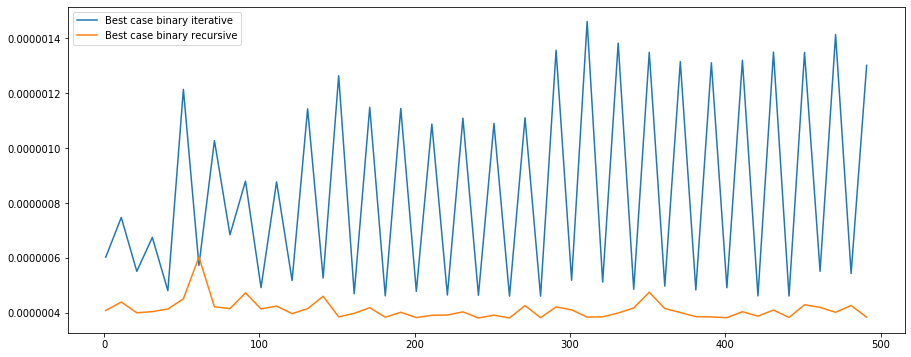

In [71]:
# code to plot results adapted from https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html

import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
x = list_created

a = best_case_binary_search_iterative
plt.plot(x, a, label = "Best case binary iterative")

b = best_case_binary_search_recursive
plt.plot(x, b, label = "Best case binary recursive")

plt.legend()

plt.savefig('Best_case_binary_search.png')

plt.show()

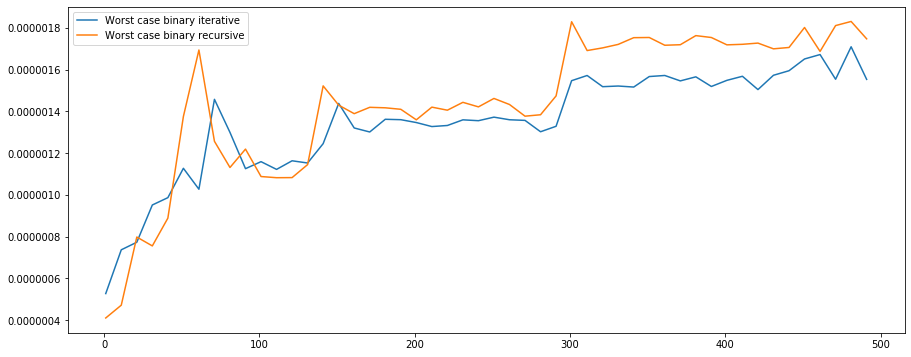

In [72]:
# code to plot results adapted from https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html

import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))

c = worst_case_binary_search_iterative
plt.plot(x, c, label = "Worst case binary iterative")

d = worst_case_binary_search_recursive
plt.plot(x, d, label = "Worst case binary recursive")

plt.legend()

plt.savefig('Worst_case_binary_search.png')

plt.show()

__Both binary search algorithms have similar run times as shown in the above graphs. This happens because the binary search iterative and the binary search recursive both have similar time complexity. Even though the the recursive function calls itself, the compiler does NOT need to save the stack frames for later, so there is no tail, this explains the time complexity being similar.__

__The idea of using binary search (either iterative or recursive) as an alternative to iterative is to reduce time complexity from Iterative O(n) to Binary O(Log n).__

__It is also interesting to point out there are some peaks when running the binary iterative search with the target being the best case. I belive that happens because even though we are running the algorithm 10000 times to get the average run time, the program still only takes a few seconds to run, meaning if the machine is busy computing something else at a certain time, peaks would still apear. Over all, the best case iterative seems to be taking longer than the best case recursive on my machine. If I had to choose one of the two algorithms to use, I would obiously then choose the binary search recursive as it takes less time and the results seem more reliable. I would also check the results on different machines to make sure my finding is correct.__

# __5. Use curve-fitting algorithms to find the equation of the running times obtained from task 2-4.__

In [73]:
# code below for curve fitting adapted from https://astrofrog.github.io/py4sci/_static/15.%20Fitting%20models%20to%20data.html

from scipy.optimize import curve_fit

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def line(x, a, b, c, d):
    return (a*x**3) + (b*x**2) + (c*x) + d

__When there are multiple data points, we can use a mathematical function to construct a curve with the best fit for the multiple data points. To show this with the data obtained from the run time of the two binary search functions, I used a third degree polynomial equation to best fit the data, because it exactly fits 4 points.__

In [74]:
xaxis = np.array(x)
xaxis2 = np.array(value_list)
yaxis1 = np.array(best_case_binary_search_iterative)
yaxis2 = np.array(best_case_binary_search_recursive)
yaxis3 = np.array(worst_case_binary_search_iterative)
yaxis4 = np.array(worst_case_binary_search_recursive)
yaxis5 = np.array(results_list_nontail)
yaxis6 = np.array(results_list_tail)
yaxis7 = np.array(results_list_iterative)

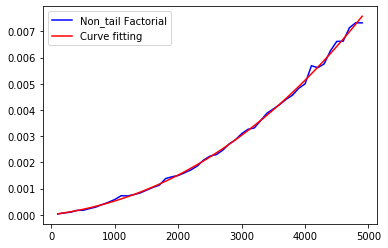

In [75]:
param1, param_best_itetative = curve_fit(line, xaxis2, yaxis5)
plt.figure()
plt.plot(xaxis2, yaxis5, 'b',label='Non_tail Factorial')
plt.plot(xaxis2, line(xaxis2, *param1), 'r-',label='Curve fitting')
plt.legend()

plt.savefig('Curve_fitting_non_tail_fac.png')

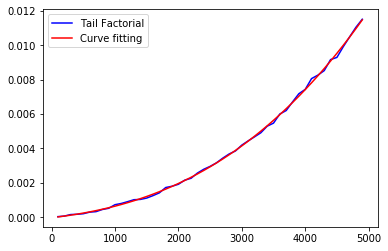

In [76]:
param1, param_best_itetative = curve_fit(line, xaxis2, yaxis6)
plt.figure()
plt.plot(xaxis2, yaxis6, 'b',label='Tail Factorial')
plt.plot(xaxis2, line(xaxis2, *param1), 'r-',label='Curve fitting')
plt.legend()

plt.savefig('Curve_fitting_tail_fac.png')

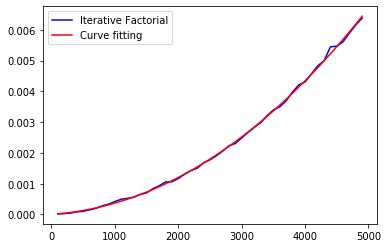

In [77]:
param1, param_best_itetative = curve_fit(line, xaxis2, yaxis7)
plt.figure()
plt.plot(xaxis2, yaxis7, 'b',label='Iterative Factorial')
plt.plot(xaxis2, line(xaxis2, *param1), 'r-',label='Curve fitting')
plt.legend()

plt.savefig('Curve_fitting_iterative_fac.png')

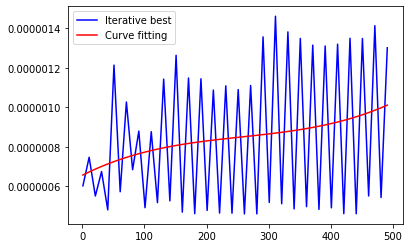

In [78]:
param1, param_best_itetative = curve_fit(line, xaxis, yaxis1)
plt.figure()
plt.plot(xaxis, yaxis1, 'b',label='Iterative best')
plt.plot(xaxis, line(xaxis, *param1), 'r-',label='Curve fitting')
plt.legend()

plt.savefig('Curve_fitting_binary_search_iter_best_case.png')

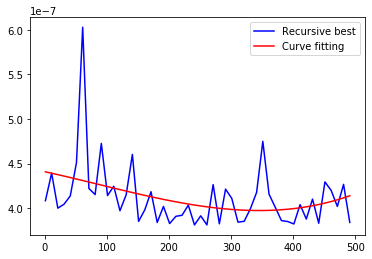

In [79]:
param1, param_best_recursive = curve_fit(line, xaxis, yaxis2)
plt.figure()
plt.plot(xaxis, yaxis2, 'b',label='Recursive best')
plt.plot(xaxis, line(xaxis, *param1), 'r-',label='Curve fitting')
plt.legend()

plt.savefig('Curve_fitting_binary_search_recurs_best_case.png')

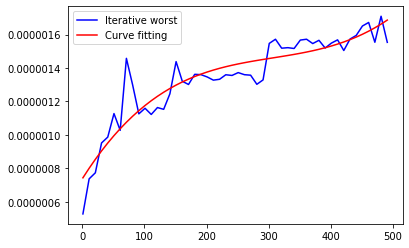

In [80]:
param1, param_worst_iterative = curve_fit(line, xaxis, yaxis3)
plt.figure()
plt.plot(xaxis, yaxis3, 'b',label='Iterative worst')
plt.plot(xaxis, line(xaxis, *param1), 'r-',label='Curve fitting')
plt.legend()

plt.savefig('Curve_fitting_binary_search_iter_worst_case.png')

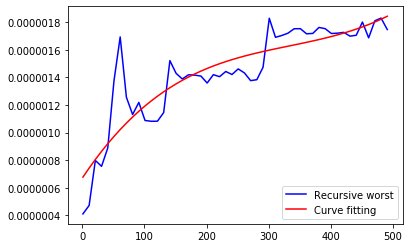

In [81]:
param1, param_worst_recursive = curve_fit(line, xaxis, yaxis4)
plt.figure()
plt.plot(xaxis, yaxis4, 'b',label='Recursive worst')
plt.plot(xaxis, line(xaxis, *param1), 'r-',label='Curve fitting')
plt.legend()

plt.savefig('Curve_fitting_binary_search_recurs_worst_case.png')

__The curve fitting algorithm seems to have an almost perfect fit for the Factorial algorithms and a little less so for the Binary Search algorithms.
The third degree polynomial equation seems to be the correct one to use, as the curve fitting algorith ajusts to even the spikes found in one of the graphs.__